# Classification example 2: the iris dataset

In [0]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Download the data with pandas to a data frame

fname = 'https://gist.github.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

df = pd.read_csv(fname)

In [3]:
# Take a look at the first few samples of the data

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'] = df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [0]:
# Convert the data to a NumPy array 

irises = df.values

In [7]:
# Take a look at the first few samples

irises[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [0]:
# Randomly shuffle the data samples

np.random.shuffle(irises)

In [0]:
# Separate the attributes and the labels

samples = irises[:,:4]
labels = irises[:,4]

In [0]:
# Convert the string labels to numbers 0, 1 and 2

#labels_num = np.zeros(len(labels))
#
#for i in range(len(labels)):
#    if (labels[i] == 'versicolor'):
#        labels_num[i] = 1
#    elif (labels[i] == 'virginica'):
#        labels_num[i] = 2    

In [0]:
# Construct the one-hot labels

from keras.utils import to_categorical

one_hot_labels = to_categorical(labels)

In [0]:
# Separate the data for training and validation purposes

train_data = samples[:100]
val_data = samples[100:]

train_labels = one_hot_labels[:100]
val_labels = one_hot_labels[100:]

In [14]:
# Build the model

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [16]:
# Fit the model with the data

history = model.fit(train_data, train_labels, epochs = 100, batch_size = 10, 
                    validation_data = (val_data, val_labels))

Train on 100 samples, validate on 50 samples
Epoch 1/100
100/100 [==============================] - 0s 5ms/step - loss: 2.7231 - acc: 0.3100 - val_loss: 1.9342 - val_acc: 0.3800
Epoch 2/100
100/100 [==============================] - 0s 197us/step - loss: 2.3756 - acc: 0.3100 - val_loss: 1.7621 - val_acc: 0.3800
Epoch 3/100
100/100 [==============================] - 0s 192us/step - loss: 2.1439 - acc: 0.3100 - val_loss: 1.6234 - val_acc: 0.3400
Epoch 4/100
100/100 [==============================] - 0s 195us/step - loss: 1.9451 - acc: 0.3000 - val_loss: 1.4957 - val_acc: 0.3200
Epoch 5/100
100/100 [==============================] - 0s 181us/step - loss: 1.7697 - acc: 0.3000 - val_loss: 1.3821 - val_acc: 0.3200
Epoch 6/100
100/100 [==============================] - 0s 193us/step - loss: 1.6101 - acc: 0.3000 - val_loss: 1.2772 - val_acc: 0.3200
Epoch 7/100
100/100 [==============================] - 0s 170us/step - loss: 1.4632 - acc: 0.3000 - val_loss: 1.1774 - val_acc: 0.3200
Epoch 8/100


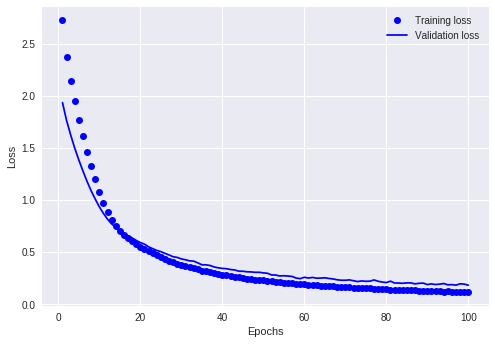

In [17]:
# Visualize the training process: loss function

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

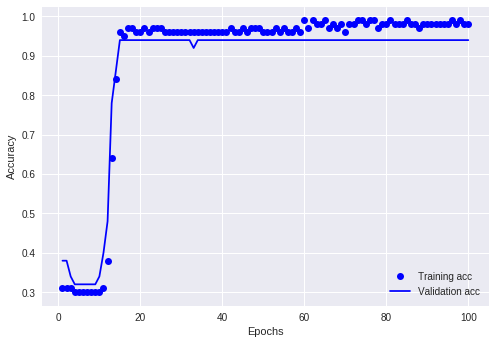

In [18]:
# Training & validation ccuracy

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Compute some predictions with the trained model 

# Display with floating point 3 decimals
np.set_printoptions(precision=3)
print(model.predict(val_data[:5]))

[[9.891e-01 1.094e-02 5.125e-07]
 [9.687e-06 3.919e-02 9.608e-01]
 [2.586e-06 3.739e-02 9.626e-01]
 [1.793e-06 1.421e-02 9.858e-01]
 [1.934e-03 6.881e-01 3.100e-01]]


In [26]:
 # Display with fixed point 3 decimal
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
 model.predict(val_data[:5])

array([[0.989, 0.011, 0.000],
       [0.000, 0.039, 0.961],
       [0.000, 0.037, 0.963],
       [0.000, 0.014, 0.986],
       [0.002, 0.688, 0.310]], dtype=float32)

In [27]:
# Compare the above predictions with the true labels

val_labels[:5]

array([[1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.000, 1.000, 0.000]], dtype=float32)